# Stabler's tree-based formalism

## The basic feature calculus

In [85]:
type Phon = String

data CatSel = N | V | D deriving Eq

instance Show CatSel where
    show N = "n"
    show V = "v"
    show D = "d"

data CatLic = Wh | Top deriving Eq

instance Show CatLic where
    show Wh = "wh"
    show Top = "top"

data Feature = Sel { selector :: Bool, cat :: CatSel } | Lic { goal :: Bool, catLic :: CatLic } deriving Eq

instance Show Feature where
    show (Sel True c) = "=" ++ show c
    show (Sel False c) = show c
    show (Lic True c) = "-" ++ show c
    show (Lic False c) = "+" ++ show c
    
Sel True D
Lic True Wh

=d

-wh

## A datatype for lexical items and MGs

In [142]:
data Lex = Lex { phon :: Phon, f :: [Feature] } deriving Eq

type MG = [Lex]

instance Show Lex where
    show (Lex phon xs) = phon ++ ":: " ++ show xs

## A datatype for derived representations

Lexical items label tree nodes (bare phrase structure).

In [143]:
import Diagrams.TwoD.Layout.Tree

type SynTree = BTree Lex

## External merge

In [147]:
import Diagrams.Prelude hiding (Empty)

sat :: Feature -> Feature -> Bool
sat (Sel True _) (Sel False _) = True

-- First we need a helper function to decide if a tree is a leaf (i.e., a terminal)
isLeaf :: SynTree -> Bool
isLeaf (BNode _ Empty Empty) = True
isLeaf _ = False

In [154]:
the :: Lex
the = Lex {phon = "the", f = [Sel True N, Sel False D]}

dog :: Lex
dog = Lex {phon = "dog", f = [Sel False N]}

eMerge :: SynTree -> SynTree -> SynTree
eMerge (BNode head Empty Empty) (BNode comp t t') = BNode head (BNode head Empty Empty) (BNode comp t t')

eMerge 

# Displaying binary trees in haskell via `diagrams`

In [27]:
{-# LANGUAGE NoMonomorphismRestriction #-}

import Diagrams.Backend.Cairo.CmdLine (B)
import Data.Maybe (fromJust)

t = BNode ">" (BNode ">" (leaf "<") (leaf ">")) (BNode "<" (leaf ">") (leaf "<"))

In [149]:
drawNode n = text n # lw 1 # fontSizeL 0.2 # fc black # scaleX 1
 <> rect 0.5 0.5 # fc white

drawBranch = (~~)

drawLex :: Lex -> QDiagram B V2 Double Any
drawLex lex = text (show lex) # lw 1 # fontSizeL 0.2 # fc black # scaleX 1
 <> rect 0.5 0.5 # fc white

myRenderTree = renderTree drawNode drawBranch . fromJust . uniqueXLayout 1 1

myRenderSynTree = renderTree drawLex drawBranch . fromJust . uniqueXLayout 1 1

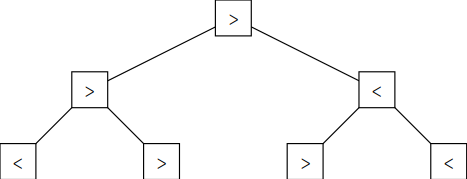

In [150]:
myRenderTree t :: QDiagram B V2 Double Any